In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from math import floor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor



Lectura de datos

In [2]:
data_dir = Path('')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('processed_data.parquet')
)


In [3]:
reduced_df = full_df[['airport_fee', 'PULocationID', 'DOLocationID', 'trip_distance', 'congestion_surcharge', 'pickup_day', 'pickup_month', 'pickup_hour', 'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'payment_type_5']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_df, 
    full_df['total_amount'],  
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((16686406, 13), (7151318, 13))

In [5]:
X_train_discretized, X_test_discretized, y_train_discretized, y_test_discretized = train_test_split(
    reduced_df, 
    full_df['cost_caterogy'],  
    test_size=0.3,
    random_state=42)

In [11]:
# Modelos a ensayar.
models = [
    #("KNeighborsRegressor", KNeighborsRegressor()),
    ("LinearRegression", LinearRegression()),
    ("RandomForest", RandomForestRegressor(n_estimators=20, random_state=42)),
    
]
models_svc = [
    ("LinearSVC", svm.SVR(max_iter=5))
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled_classification = scaler.fit_transform(X_train_discretized)
X_test_scaled_classification = scaler.fit_transform(X_test_discretized)

# Aquí almacenaremos los resultados.
results_regression = {}
models_trained_regression = {}
results_svc_regression = {}
models_trained_svc_regression = {}

# Etrenamos cada modelo svc y almacenamos los resultados.
for m in models_svc:
    model_name = m[0]
    results_svc_regression[model_name] = {}
    models_trained_svc_regression[model_name] = {}
    model = clone(m[1])
    
    scenario = "amount"
    print(model_name)
    print(scenario)
    model.fit(X_train_scaled[:100000], y_train[:100000])
    predictions = model.predict(X_test_scaled)
    err = mean_squared_error(y_test, predictions, squared=False)
    results_svc_regression[model_name][scenario + "_err"] = err
    results_svc_regression[model_name][scenario + "score"] = model.score(X_test_scaled,y_test)
    models_trained_svc_regression[model_name][scenario] = model

    
# Etrenamos cada modelo y almacenamos los resultados.
for m in models:
    model_name = m[0]
    results_regression[model_name] = {}
    models_trained_regression[model_name] = {}
    model = clone(m[1])
    
    scenario = "amount"
    print(model_name)
    print(scenario)
    model.fit(X_train[:100000], y_train[:100000])
    predictions = model.predict(X_test)
    err = mean_squared_error(y_test, predictions, squared=False)
    results_regression[model_name][scenario + "_err"] = err
    models_trained_regression[model_name][scenario] = model

df_results = pd.DataFrame(results_regression).T
print(df_results)

df_results_svc = pd.DataFrame(results_svc_regression).T
print(df_results_svc)

LinearSVC
amount


/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


LinearRegression
amount
RandomForest
amount
                  amount_err
LinearRegression    6.594202
RandomForest        5.518615
           amount_err  amountscore
LinearSVC   27.552925    -3.249111


Feature: airport_fee, Score: 0.00000
Feature: PULocationID, Score: 0.03694
Feature: DOLocationID, Score: 0.03891
Feature: trip_distance, Score: 0.79719
Feature: congestion_surcharge, Score: 0.02618
Feature: pickup_day, Score: 0.02423
Feature: pickup_month, Score: 0.01613
Feature: pickup_hour, Score: 0.02389
Feature: payment_type_1, Score: 0.03182
Feature: payment_type_2, Score: 0.00155
Feature: payment_type_3, Score: 0.00094
Feature: payment_type_4, Score: 0.00224
Feature: payment_type_5, Score: 0.00000


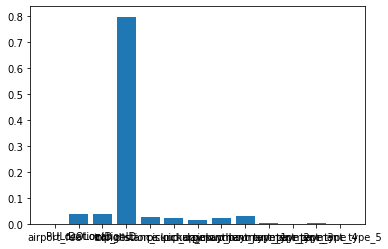

In [16]:
importance = models_trained_regression['RandomForest']['amount'].feature_importances_
for i,v in zip(X_train.columns, importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(list(X_train.columns), list(importance))
pyplot.show()

LinearSVC
classification


/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


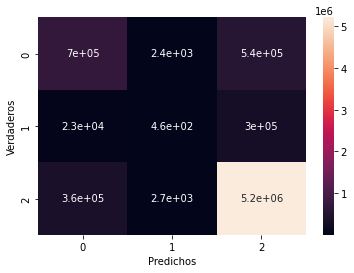

LogisticRegressionCV
classification


/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

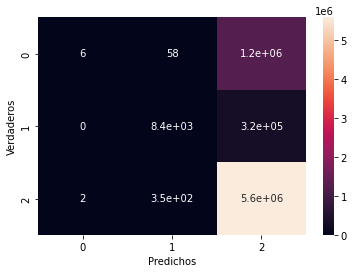

RandomForest
classification


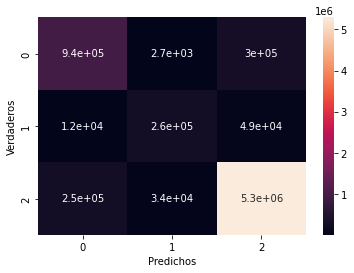

                     classification_accuracy_score classificationscore  \
LogisticRegressionCV                      0.781947            0.781947   
RandomForest                              0.908282            0.908282   

                                         classificationconfusion_matrix  
LogisticRegressionCV  [[6, 58, 1242610], [0, 8387, 316346], [2, 351,...  
RandomForest          [[936967, 2651, 303056], [11875, 263359, 49499...  
          classification_accuracy_score  \
LinearSVC                      0.827284   

                              classificationconfusion_matrix  \
LinearSVC  [[697993, 2405, 542276], [23166, 461, 301106],...   

          classificationscore  
LinearSVC            0.827284  


In [10]:
# Modelos a ensayar.
models = [
    ("LogisticRegressionCV", LogisticRegressionCV(random_state=42, solver='lbfgs', max_iter=5)),
    ("RandomForest", RandomForestClassifier(n_estimators=5, random_state=42)),
    
]
models_svc = [
    ("LinearSVC", LinearSVC(random_state=42, tol=1e-5,max_iter=5))
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled_classification = scaler.fit_transform(X_train_discretized)
X_test_scaled_classification = scaler.fit_transform(X_test_discretized)

# Aquí almacenaremos los resultados.
results = {}
models_trained = {}
results_svc = {}
models_trained_svc = {}

# Etrenamos cada modelo svc y almacenamos los resultados.
for m in models_svc:
    model_name = m[0]
    results_svc[model_name] = {}
    models_trained_svc[model_name] = {}
    model = clone(m[1])
    
    scenario = "classification"
    print(model_name)
    print(scenario)
    model.fit(X_train_scaled_classification[:100000], y_train_discretized[:100000])
    predictions = model.predict(X_test_scaled_classification)
    acc = accuracy_score(y_test_discretized, predictions)
    results_svc[model_name][scenario + "_accuracy_score"] = accuracy_score(y_test_discretized, predictions)
    results_svc[model_name][scenario + "score"] = model.score(X_test_scaled_classification, y_test_discretized)
    models_trained_svc[model_name][scenario] = model
    results_svc[model_name][scenario + "confusion_matrix"] = confusion_matrix(y_test_discretized, predictions)
    sns.heatmap(confusion_matrix(y_test_discretized, predictions), annot=True)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()
    
# Etrenamos cada modelo y almacenamos los resultados.
for m in models:
    model_name = m[0]
    results[model_name] = {}
    models_trained[model_name] = {}
    model = clone(m[1])

    scenario = "classification"
    print(model_name)
    print(scenario)
    model.fit(X_train_discretized[:100000], y_train_discretized[:100000])
    predictions = model.predict(X_test_discretized)
    acc = accuracy_score(y_test_discretized, predictions)
    results[model_name][scenario + "_accuracy_score"] = accuracy_score(y_test_discretized, predictions)
    results[model_name][scenario + "score"] = model.score(X_test_discretized, y_test_discretized)
    models_trained[model_name][scenario] = model
    results[model_name][scenario + "confusion_matrix"] = confusion_matrix(y_test_discretized, predictions)
    sns.heatmap(confusion_matrix(y_test_discretized, predictions), annot=True)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()

df_results = pd.DataFrame(results).T
print(df_results)

df_results_svc = pd.DataFrame(results_svc).T
print(df_results_svc)

Feature: airport_fee, Score: 0.00000
Feature: PULocationID, Score: 0.08435
Feature: DOLocationID, Score: 0.07638
Feature: trip_distance, Score: 0.57473
Feature: congestion_surcharge, Score: 0.03657
Feature: pickup_day, Score: 0.06763
Feature: pickup_month, Score: 0.03729
Feature: pickup_hour, Score: 0.05836
Feature: payment_type_1, Score: 0.05250
Feature: payment_type_2, Score: 0.00986
Feature: payment_type_3, Score: 0.00102
Feature: payment_type_4, Score: 0.00132
Feature: payment_type_5, Score: 0.00000


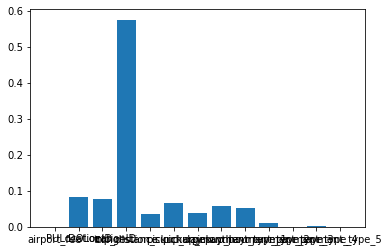

In [18]:
importance = models_trained['RandomForest']['classification'].feature_importances_
for i,v in zip(X_train.columns, importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(list(X_train.columns), list(importance))
pyplot.show()